In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
from reactit import ReactionGenerator

compounds = {0:'CO2',
              1:'H2O', 
              2:'SO2', 
              3:'NO2', 
              4:'H2S', 
              5:'N2',
              6:'O2',
              7:'H2',
              8:'CO',
              9:'H2SO4',
              10:'HNO3',
              11:'H2SO3',
              12:'HNO2'}

In [111]:
rg = ReactionGenerator(compounds=compounds)
reactions = rg.iterate(max_length=5)

100%|██████████| 1280/1280 [00:02<00:00, 442.12it/s]


In [112]:
import pandas as pd 
pd.Series(reactions)

0                         1 O2 + 2 HNO2 = 2 HNO3
1                         2 H2S + 3 O2 = 2 H2SO3
2                            2 NO2 = 1 N2 + 2 O2
3                          2 NO2 + 1 H2 = 2 HNO2
4                         1 H2S + 2 O2 = 1 H2SO4
                         ...                    
140       4 H2O + 1 SO2 + 6 NO2 = 1 H2S + 6 HNO3
141       4 SO2 + 3 H2 + 2 HNO2 = 1 N2 + 4 H2SO3
142    1 H2O + 1 SO2 + 1 HNO3 = 1 H2SO4 + 1 HNO2
143        1 SO2 + 2 HNO3 = 2 NO2 + 1 H2S + 2 O2
144       1 H2S + 2 HNO2 = 1 N2 + 1 H2 + 1 H2SO4
Length: 145, dtype: object

> ![note] 
output can also be passed as a dictionary with `.as_dict()` which includes a breakdown of reactants and products alongside balanced coefficients

In [113]:
_dict = rg.as_dict()
_dict[0]

{'reaction_string': '1 O2 + 2 HNO2 = 2 HNO3',
 'reactants': {'O2': 1, 'HNO2': 2},
 'products': {'HNO3': 2}}

>[!note] 
> reactions can also be converted to `chempy` objects or `pymatgen` objects 

In [114]:
chempy_reactions = rg.to_chempy()
chempy_reactions[0]

In [115]:
pymatgen_reactions = rg.to_pymatgen()
pymatgen_reactions[0]

2 HNO2 + O2 -> 2 HNO3

>[!note]
> now as nx_graph

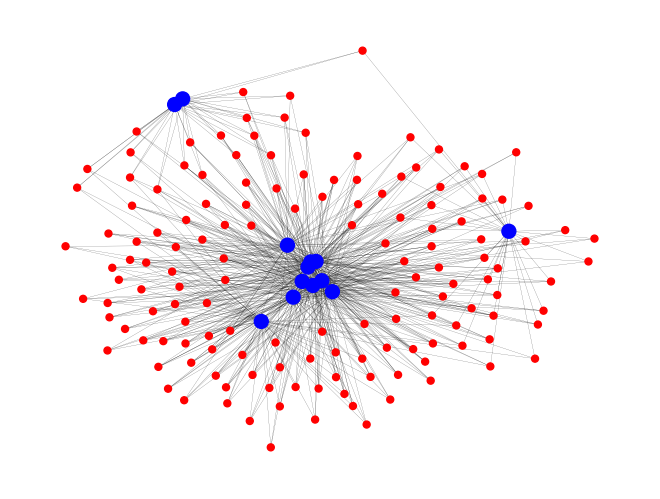

In [116]:
graph = rg.to_networkx_graph()

import networkx as nx 

node_colours= []
node_sizes = []
for node in list(graph.nodes):
    if isinstance(node,int):
        node_colours.append('red')
        node_sizes.append(25)
    else:
        node_colours.append('blue')
        node_sizes.append(100)

nx.draw(graph,node_color=node_colours,node_size=node_sizes,width=0.1)